# Hotel Booking Cancellation

### Importing Libraries

In [1]:
!pip install folium
!pip install plotly
!pip install sort_dataframeby_monthorweek
!pip install sorted-months-weekdays
!pip install scikit-learn
!pip install jupyterthemes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
import plotly.express as px
import sort_dataframeby_monthorweek as sd
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
# plot_precision_recall_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix, average_precision_score, precision_recall_curve, accuracy_score
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [3]:
'''Getting path'''
curr = os.getcwd()
path = os.path.join(curr, 'hotel_bookings.csv')

In [4]:
df = pd.read_csv(path)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Exploratory Data Analysis

In [5]:
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [6]:
'''Company ID'''
df['company'].value_counts().sort_index()

6.0       1
8.0       1
9.0      37
10.0      1
11.0      1
         ..
531.0     1
534.0     2
539.0     2
541.0     1
543.0     2
Name: company, Length: 352, dtype: int64

In [7]:
'''Agent ID'''
df['agent'].value_counts().sort_index()

1.0      7191
2.0       162
3.0      1336
4.0        47
5.0       330
         ... 
510.0       2
526.0      10
527.0      35
531.0      68
535.0       3
Name: agent, Length: 333, dtype: int64

In [8]:
'''Country Name'''
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

**All these columns can be filled with '0' to impute missing data without loosing generality.**

In [9]:
'''Function to impute missing data'''
def impute(df):
    df.fillna(0, inplace=True)
    print(df.isna().sum())

In [10]:
impute(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
df.shape

(119390, 32)

In [13]:
'''Exploring Age Categories'''
list = ['adults', 'children', 'babies']
for i in list:
    print("{} has unique values of {}".format(i, np.sort(df[i].unique())))

adults has unique values of [ 0  1  2  3  4  5  6 10 20 26 27 40 50 55]
children has unique values of [ 0.  1.  2.  3. 10.]
babies has unique values of [ 0  1  2  9 10]


**Cannot be zero at the same time. So lets check out for such false data.**

In [14]:
pd.set_option('display.max_columns', 32) #Displaying all columns.
filters = ((df['adults']==0) & (df['children']==0) & (df['babies']==0))
df[filters]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [15]:
df[-filters]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [16]:
df[filters].index

Int64Index([  2224,   2409,   3181,   3684,   3708,   4127,   9376,  31765,
             32029,  32827,
            ...
            112558, 113188, 114583, 114908, 114911, 115029, 115091, 116251,
            116534, 117087],
           dtype='int64', length=180)

In [17]:
#df.drop(index=df[filters].index, inplace=True)

In [18]:
'''Analysing Country'''
df_country = df[df['is_canceled']==0]['country'].value_counts().reset_index()
df_country.columns=['country', 'guests']
df_country

,country,guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [19]:
'''Plotting guest density on World Map'''
basemap = folium.Map()
guest_map = px.choropleth(df_country, locations=df_country['country'], color=df_country['guests'], hover_name=df_country['country'],
                           title ='Home country of guest')
guest_map.show()

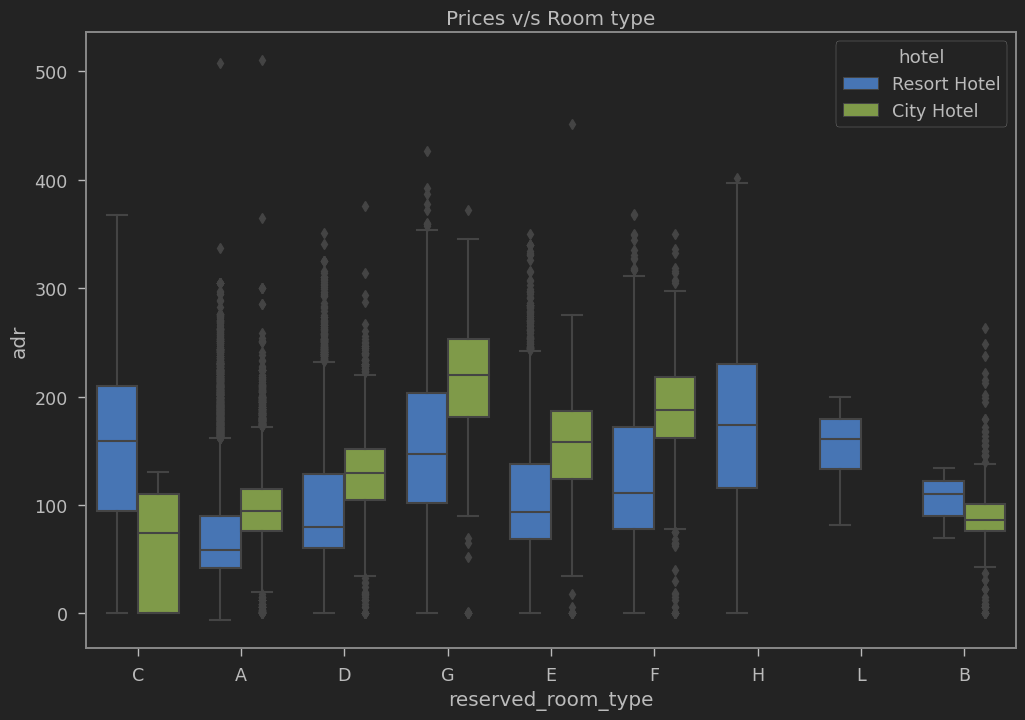

In [20]:
'''Analysing room types to find a pattern'''
df_not_cancel = df[df['is_canceled']==0]
plt.figure(figsize=(12, 8))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=df_not_cancel)
plt.title('Prices v/s Room type')
plt.show()

In [21]:
'''Analysing Resort and CIty hotel seperately'''
'''Hotel Booking Cancellation may depend on hotel type'''

'Hotel Booking Cancellation may depend on hotel type'

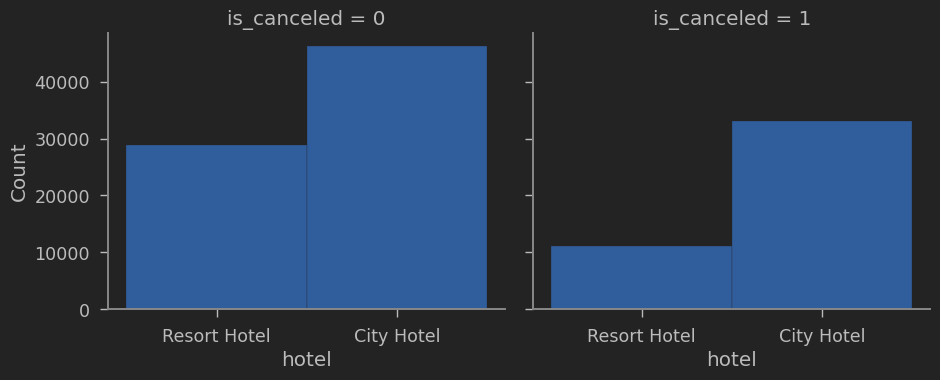

In [22]:
'''Hypothesis'''
g = sns.FacetGrid(df, col='is_canceled', height=4, aspect=1.2)
g.map(sns.histplot, 'hotel')

**City Hotel has higher cancellation rates**

In [23]:
cond1 = (df['hotel']=='Resort Hotel') & (df['is_canceled']==0)
df_resort = df[cond1]
df_resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,1.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143.0,0.0,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0.0,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0.0,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40.0,0.0,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [24]:
cond2 = (df['hotel']=='City Hotel') & (df['is_canceled']==0)
df_city = df[cond2]
df_city

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-03
40066,City Hotel,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
40070,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
40071,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,2015-07-05
40072,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [25]:
resort_hotel_price = df_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel_price

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [26]:
city_hotel_price = df_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel_price

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [27]:
hotel_price = resort_hotel_price.merge(city_hotel_price, on='arrival_date_month')
hotel_price.columns=['Month', 'Resort Price', 'City Price']
hotel_price

,Month,Resort Price,City Price
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [28]:
'''Sorting by month for better visualization'''
def sort_data(dfx,column):
    return sd.Sort_Dataframeby_Month(dfx,column)

In [29]:
hotel_price = sort_data(hotel_price, 'Month')
hotel_price

,Month,Resort Price,City Price
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [30]:
'''Visualization'''
px.line(hotel_price, x='Month', y=['Resort Price', 'City Price'], title='Rent per night over Month')

In [31]:
'''Now lets visualize cancellation rates. Comparing may help the hypothesis'''
rush_resort = df_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month', 'guests']
rush_resort

,month,guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [32]:
rush_city = df_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month', 'guests']
rush_city

,month,guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [33]:
total_rush = rush_resort.merge(rush_city, on='month')
total_rush.columns=['Month', 'Resort Guests', 'City Guests']
total_rush = sort_data(total_rush, 'Month')
total_rush

,Month,Resort Guests,City Guests
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [34]:
px.line(total_rush, x='Month', y=['Resort Guests', 'City Guests'], title='Guests over the year per month')

#### Continuous Variable Analysis

In [35]:
corr = df.corr()['is_canceled'].abs().sort_values(ascending=False)
corr

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

'Hypothesis rejected'

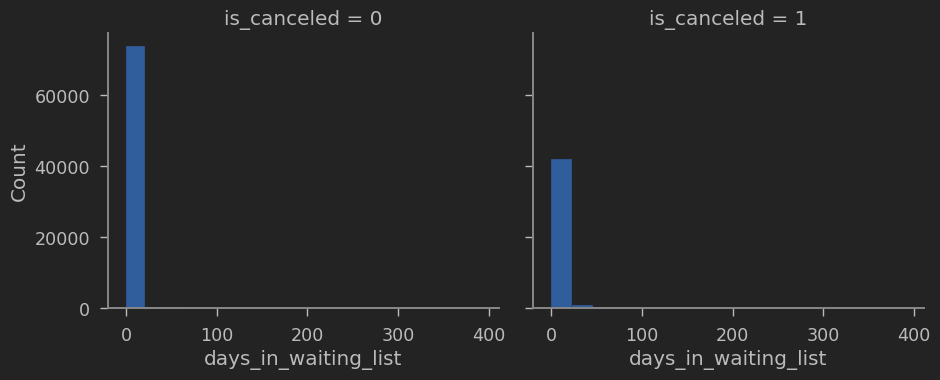

In [36]:
'''Hypothesis'''
g = sns.FacetGrid(df, col='is_canceled', height=4, aspect=1.2)
g.map(sns.histplot, 'days_in_waiting_list')
'''Hypothesis rejected'''

In [37]:
'''Cols to be excluded'''
num_not = ['days_in_waiting_list', 'arrival_date_year']

In [38]:
num_cols = [col for col in df.columns if df[col].dtype!='O' and col not in num_not]
num_cols

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [39]:
df_num = df[num_cols]
df_num

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.00,0,0
1,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.00,0,0
2,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.00,0,0
3,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.00,0,0
4,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,96.14,0,0
119386,0,102,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,225.43,0,2
119387,0,34,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,157.71,0,4
119388,0,109,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,104.40,0,0


#### Categorical Variable Anaysis

In [40]:
'''Hypothesis'''
df.groupby(['is_canceled'])['reservation_status'].value_counts()
'''Hypothesis Accepted: Reservation Status is derivatio of is canceled and must be excluded'''

'Hypothesis Accepted: Reservation Status is derivatio of is canceled and must be excluded'

In [41]:
'''Cols to be excluded'''
cat_not = ['arrival_date_year', 'assigned_room_type', 'booking_charges', 'reservation_status', 'country', 'days_in_waiting_list']

In [42]:
cat_cols = [col for col in df.columns if df[col].dtype=='O' and col not in cat_not]
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [43]:
df_cat = df[cat_cols]
df_cat

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017-09-06
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,2017-09-07
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,2017-09-07
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,2017-09-07


In [44]:
'''Date Analysis'''
df_cat.dtypes

hotel                      object
arrival_date_month         object
meal                       object
market_segment             object
distribution_channel       object
reserved_room_type         object
deposit_type               object
customer_type              object
reservation_status_date    object
dtype: object

In [45]:
df_cat['reservation_status_date']=pd.to_datetime(df_cat['reservation_status_date'])

In [46]:
df_cat['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [47]:
df_cat['reservation_year'] = df_cat['reservation_status_date'].dt.year
df_cat['reservation_month'] = df_cat['reservation_status_date'].dt.month
df_cat['reservation_day'] = df_cat['reservation_status_date'].dt.day

In [48]:
df_cat.drop('reservation_status_date', axis=1, inplace=True)

In [49]:
df_cat

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_year,reservation_month,reservation_day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017,9,6
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,2017,9,7
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,2017,9,7
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,2017,9,7


### Encoding Categorical Variable: Mean Encoding

In [50]:
df_cat['cancellation'] = df['is_canceled']

In [51]:
cols = df_cat.columns[:8]
for col in cols:
    dict= df_cat.groupby([col])['cancellation'].mean().to_dict()
    df_cat[col] = df_cat[col].map(dict)

In [52]:
df_cat

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_year,reservation_month,reservation_day,cancellation
0,0.277634,0.374536,0.373849,0.153419,0.174599,0.330472,0.28377,0.407463,2015,7,1,0
1,0.277634,0.374536,0.373849,0.153419,0.174599,0.330472,0.28377,0.407463,2015,7,1,0
2,0.277634,0.374536,0.373849,0.153419,0.174599,0.391074,0.28377,0.407463,2015,7,2,0
3,0.277634,0.374536,0.373849,0.187347,0.220758,0.391074,0.28377,0.407463,2015,7,2,0
4,0.277634,0.374536,0.373849,0.367211,0.410259,0.391074,0.28377,0.407463,2015,7,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417270,0.377531,0.373849,0.343160,0.410259,0.391074,0.28377,0.407463,2017,9,6,0
119386,0.417270,0.377531,0.373849,0.367211,0.410259,0.292884,0.28377,0.407463,2017,9,7,0
119387,0.417270,0.377531,0.373849,0.367211,0.410259,0.317796,0.28377,0.407463,2017,9,7,0
119388,0.417270,0.377531,0.373849,0.367211,0.410259,0.391074,0.28377,0.407463,2017,9,7,0


In [53]:
df_num

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.00,0,0
1,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.00,0,0
2,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.00,0,0
3,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.00,0,0
4,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,96.14,0,0
119386,0,102,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,225.43,0,2
119387,0,34,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,157.71,0,4
119388,0,109,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,104.40,0,0


In [54]:
dataset = pd.concat([df_cat, df_num], axis=1)
dataset

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_year,reservation_month,reservation_day,cancellation,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277634,0.374536,0.373849,0.153419,0.174599,0.330472,0.28377,0.407463,2015,7,1,0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.00,0,0
1,0.277634,0.374536,0.373849,0.153419,0.174599,0.330472,0.28377,0.407463,2015,7,1,0,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.00,0,0
2,0.277634,0.374536,0.373849,0.153419,0.174599,0.391074,0.28377,0.407463,2015,7,2,0,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.00,0,0
3,0.277634,0.374536,0.373849,0.187347,0.220758,0.391074,0.28377,0.407463,2015,7,2,0,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.00,0,0
4,0.277634,0.374536,0.373849,0.367211,0.410259,0.391074,0.28377,0.407463,2015,7,3,0,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417270,0.377531,0.373849,0.343160,0.410259,0.391074,0.28377,0.407463,2017,9,6,0,0,23,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,96.14,0,0
119386,0.417270,0.377531,0.373849,0.367211,0.410259,0.292884,0.28377,0.407463,2017,9,7,0,0,102,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,225.43,0,2
119387,0.417270,0.377531,0.373849,0.367211,0.410259,0.317796,0.28377,0.407463,2017,9,7,0,0,34,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,157.71,0,4
119388,0.417270,0.377531,0.373849,0.367211,0.410259,0.391074,0.28377,0.407463,2017,9,7,0,0,109,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,104.40,0,0


In [55]:
dataset.drop(['cancellation'], axis=1, inplace=True)
dataset['is_canceled'] = df['is_canceled']
dataset

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_year,reservation_month,reservation_day,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277634,0.374536,0.373849,0.153419,0.174599,0.330472,0.28377,0.407463,2015,7,1,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.00,0,0
1,0.277634,0.374536,0.373849,0.153419,0.174599,0.330472,0.28377,0.407463,2015,7,1,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.00,0,0
2,0.277634,0.374536,0.373849,0.153419,0.174599,0.391074,0.28377,0.407463,2015,7,2,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.00,0,0
3,0.277634,0.374536,0.373849,0.187347,0.220758,0.391074,0.28377,0.407463,2015,7,2,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.00,0,0
4,0.277634,0.374536,0.373849,0.367211,0.410259,0.391074,0.28377,0.407463,2015,7,3,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417270,0.377531,0.373849,0.343160,0.410259,0.391074,0.28377,0.407463,2017,9,6,0,23,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,96.14,0,0
119386,0.417270,0.377531,0.373849,0.367211,0.410259,0.292884,0.28377,0.407463,2017,9,7,0,102,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,225.43,0,2
119387,0.417270,0.377531,0.373849,0.367211,0.410259,0.317796,0.28377,0.407463,2017,9,7,0,34,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,157.71,0,4
119388,0.417270,0.377531,0.373849,0.367211,0.410259,0.391074,0.28377,0.407463,2017,9,7,0,109,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,104.40,0,0


### Outlier Analysis

<Axes: xlabel='lead_time', ylabel='Density'>

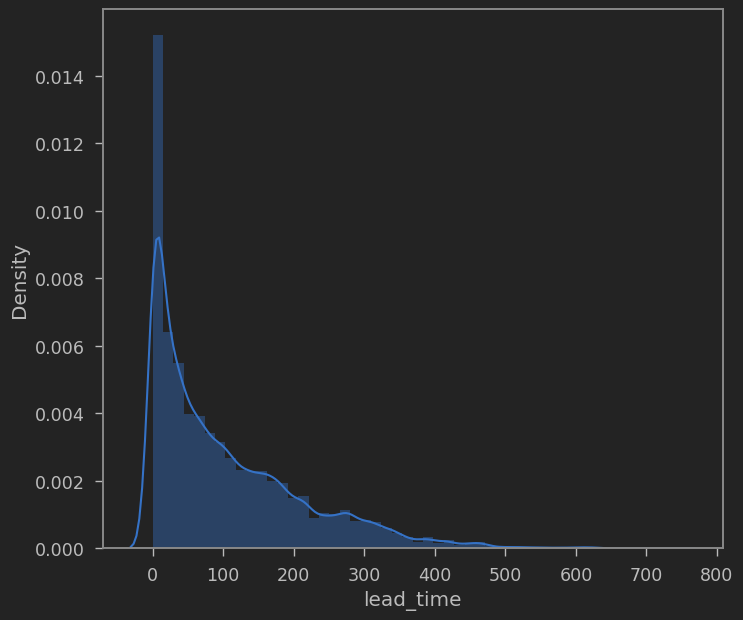

In [56]:
sns.distplot(dataset['lead_time'])

<Axes: xlabel='lead_time', ylabel='Density'>

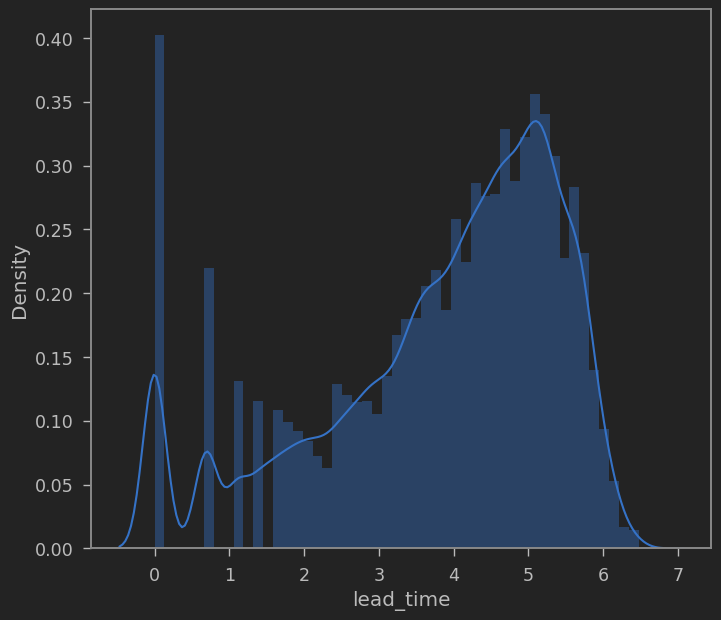

In [57]:
'''Applying Log transformation'''
sns.distplot(np.log1p(dataset['lead_time']))

In [58]:
'''function'''
def transform(col):
    dataset[col] = np.log1p(dataset[col].dropna())

In [59]:
transform('lead_time')

<Axes: xlabel='adr', ylabel='Density'>

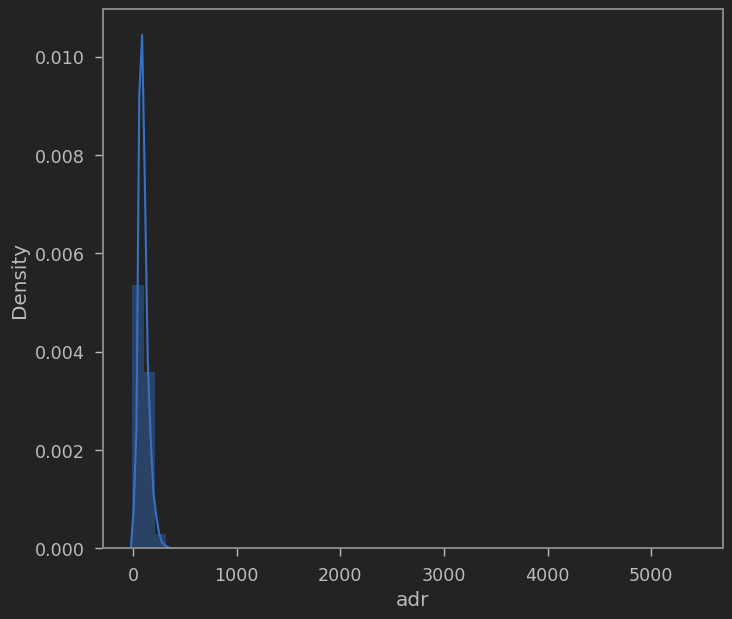

In [60]:
sns.distplot(dataset['adr'])

In [61]:
transform('adr')

<Axes: xlabel='adr', ylabel='Density'>

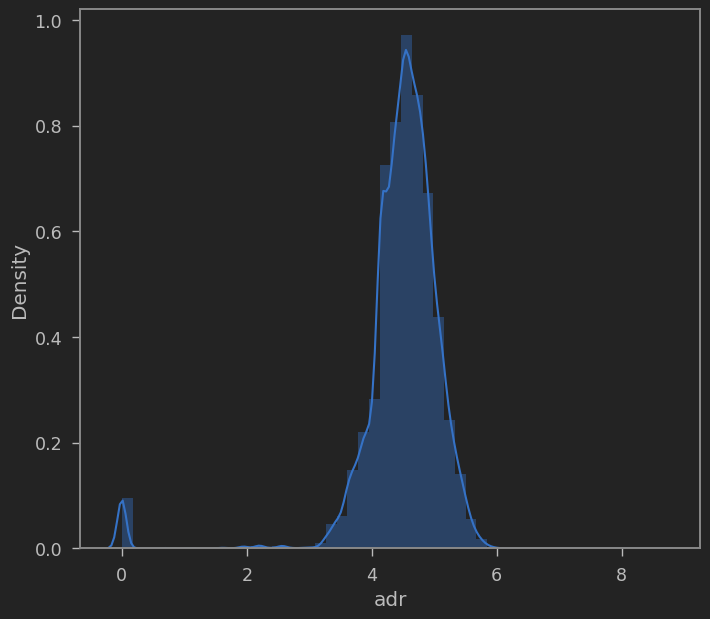

In [62]:
sns.distplot(dataset['adr'])

In [63]:
dataset.shape

(119390, 29)

In [64]:
dataset.isna().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
reservation_year                  0
reservation_month                 0
reservation_day                   0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces 

In [65]:
dataset.dropna(inplace=True)

In [66]:
dataset.isna().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
reservation_year                  0
reservation_month                 0
reservation_day                   0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               0
required_car_parking_spaces 

### Modelling 1: Data Distribution

In [67]:
y = dataset['is_canceled']
dataset.drop(['is_canceled'], axis=1, inplace=True)
X=dataset
X, y

(           hotel  arrival_date_month      meal  market_segment  \
 0       0.277634            0.374536  0.373849        0.153419   
 1       0.277634            0.374536  0.373849        0.153419   
 2       0.277634            0.374536  0.373849        0.153419   
 3       0.277634            0.374536  0.373849        0.187347   
 4       0.277634            0.374536  0.373849        0.367211   
 ...          ...                 ...       ...             ...   
 119385  0.417270            0.377531  0.373849        0.343160   
 119386  0.417270            0.377531  0.373849        0.367211   
 119387  0.417270            0.377531  0.373849        0.367211   
 119388  0.417270            0.377531  0.373849        0.367211   
 119389  0.417270            0.377531  0.344603        0.367211   
 
         distribution_channel  reserved_room_type  deposit_type  customer_type  \
 0                   0.174599            0.330472       0.28377       0.407463   
 1                   0.174599 

### Modelling 2: Feature Selection

In [68]:
'''Lasso(l1) regression and Random forest can be used for feature selection'''
feature_sel_model = SelectFromModel(Lasso(alpha=0.007, random_state=0))
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.007, random_state=0))

In [69]:
feature_sel_model.get_support()

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True])

In [70]:
cols = dataset.columns
selected_cols = cols[feature_sel_model.get_support()]
selected_cols

Index(['deposit_type', 'reservation_year', 'reservation_month',
       'reservation_day', 'lead_time', 'arrival_date_week_number', 'adults',
       'children', 'previous_cancellations', 'booking_changes', 'agent',
       'company', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

### Modelling 3: Model Selection

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [72]:
'''Logistic Regression'''
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [73]:
score = cross_val_score(logreg, X, y, cv=10)

In [74]:
score.mean()

0.663679210976566

In [75]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16468  2274]
 [ 6143  4963]]


**Logistic Regression fails to map the trend | Cart based models may provide a better accuracy**

In [76]:
'''Random Forest Classifier'''
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [77]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18635   107]
 [ 1223  9883]]


In [78]:
score = accuracy_score(y_test, y_pred)
score

0.9554409005628518

**Achieved good accuracy using Random Forest Classifier**

**As Rf's are mostly self tuned more hyperparameter tuning is not required**

### Plotting Accuracy Metrics

#### Precision Recall Curve
* Precsion: TP/TP + FP
* Recall: TP/TP + FN

In [79]:
# average_precision = average_precision_score(y_test, y_pred)
# disp = plot_precision_recall_curve(rf, X_test, y_test)
# disp.ax_.set_title('Precision-Recall curve: '
#                    'AP={0:0.2f}'.format(average_precision))
# disp

#### ROC-AUC

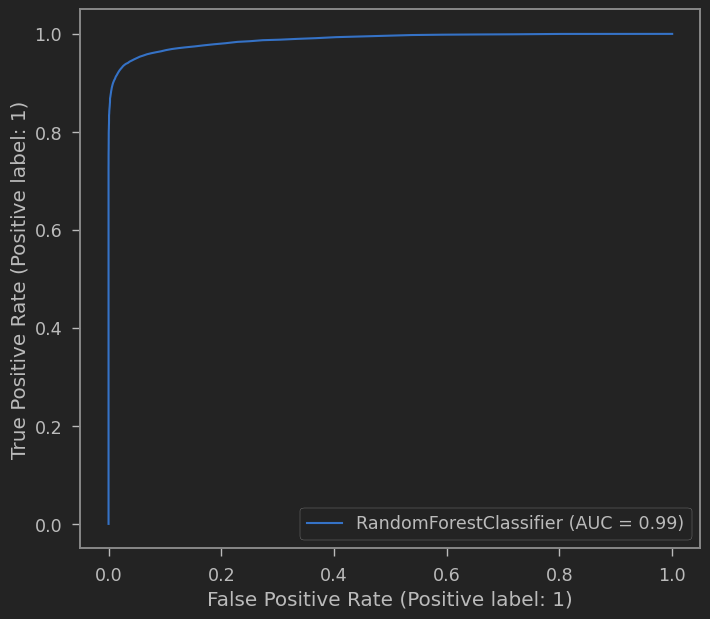

In [80]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf, X_test, y_test);

### End Notes:
* Model: Random Forest Classifier
* Accuracy: 95.4%
* Precision: 92
* ROC-AUC: 0.99